### Imports:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import cluster

### Generate easy and hard data: 3 clusters embedded in 20 dimensional space:

In [9]:
from sklearn.datasets import make_classification, make_blobs
np.random.seed(0)

# generate "easy" 20 dimensional data with 3 clusters in it:
easy20, _ = make_blobs(n_samples=10000, n_features=20, centers=3, cluster_std=1.0,
                       center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# generate "hard" 20 dimensional data with 3 clusters in it:
hard20, _ = make_classification(n_samples=10000, n_features=20, n_informative=2,
                                n_redundant=2, n_repeated=0, n_classes=1,
                                n_clusters_per_class=3, hypercube=True, random_state=77)

In [10]:
easy20.shape

(10000, 20)

### Plot some 2D projections of easy and hard data:

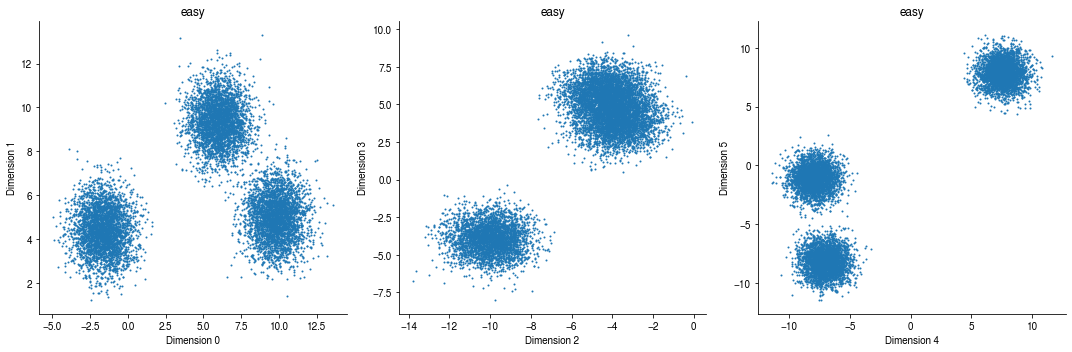

In [11]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].set_title('easy')
ax[0].set_xlabel('Dimension 0')
ax[0].set_ylabel('Dimension 1')
ax[0].scatter(easy20[:, 0], easy20[:, 1], s=1) # plot x vs. y for first two dimensions
ax[1].set_title('easy')
ax[1].set_xlabel('Dimension 2')
ax[1].set_ylabel('Dimension 3')
ax[1].scatter(easy20[:, 2], easy20[:, 3], s=1) # plot x vs. y for second two dimensions
ax[2].set_title('easy')
ax[2].set_xlabel('Dimension 4')
ax[2].set_ylabel('Dimension 5')
ax[2].scatter(easy20[:, 4], easy20[:, 5], s=1) # plot x vs. y for third two dimensions

The 3 clusters are pretty easy to spot, almost regardless of which two dimensions (plane) you choose.

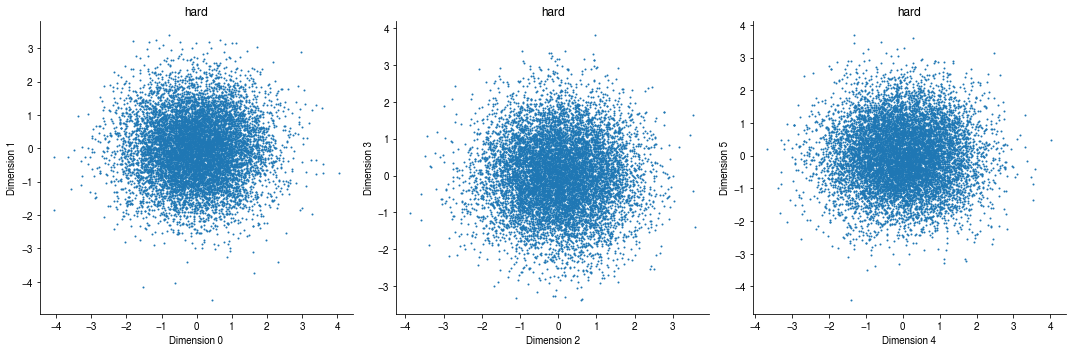

In [12]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].set_title('hard')
ax[0].set_xlabel('Dimension 0')
ax[0].set_ylabel('Dimension 1')
ax[0].scatter(hard20[:, 0], hard20[:, 1], s=1) # plot x vs. y for first two dimensions
ax[1].set_title('hard')
ax[1].set_xlabel('Dimension 2')
ax[1].set_ylabel('Dimension 3')
ax[1].scatter(hard20[:, 2], hard20[:, 3], s=1) # plot x vs. y for second two dimensions
ax[2].set_title('hard')
ax[2].set_xlabel('Dimension 4')
ax[2].set_ylabel('Dimension 5')
ax[2].scatter(hard20[:, 4], hard20[:, 5], s=1) # plot x vs. y for third two dimensions

The 3 clusters look like just one big blob, regardless of which two dimensions (plane) you choose. Finding the ideal dimensions to view the data in isn't as trivial as for the "easy" data.

### Use PCA to reduce to top 2 most informative dimensions:

Text(0, 0.5, 'PC2')

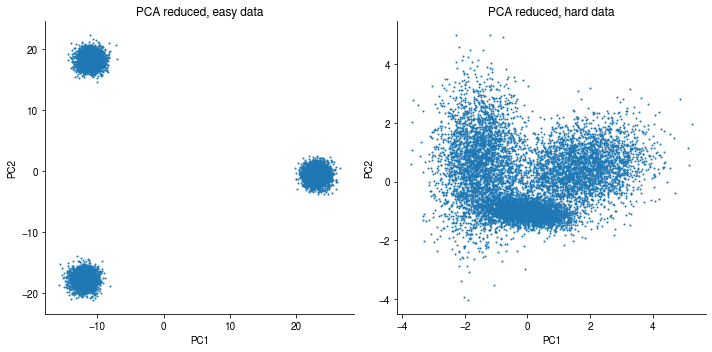

In [13]:
f, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

# easy data:
pca = PCA(n_components=2) # create a PCA object, ask for only the top 2 components
easy2 = pca.fit_transform(easy20) # calculate top 2 principal components, project data onto them
ax[0].scatter(easy2[:, 0], easy2[:, 1], s=1) # plot x vs. y for all samples in easy2
ax[0].set_title('PCA reduced, easy data')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

# hard data:
pca = PCA(n_components=2) # create a PCA object, ask for only the top 2 components
hard2 = pca.fit_transform(hard20) # calculate top 2 principal components, project data onto them
ax[1].scatter(hard2[:, 0], hard2[:, 1], s=1) # plot x vs. y for all samples in easy2
ax[1].set_title('PCA reduced, hard data')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')

### Clustering with K-Means:

Text(0, 0.5, 'PC2')

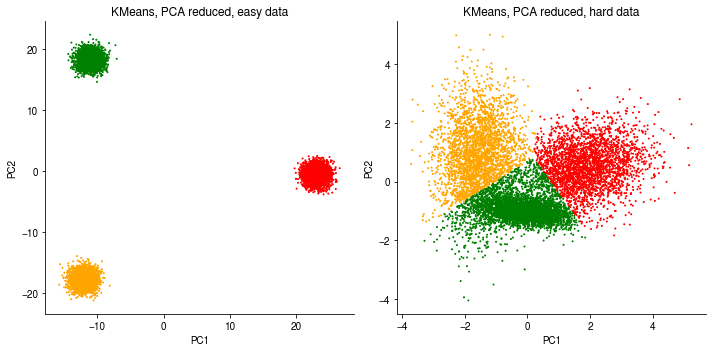

In [14]:
f, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
# repeating list of colors that we can index into using cluster IDs:
colorset = np.array(['red', 'orange', 'green', 'blue', 'magenta', 'gray', 'brown', 'black']*10)

## easy data:
kmeans = cluster.KMeans(n_clusters=3) # create a KMeans object, tell it n_clusters you want
kmeans.fit(easy2) # apply KMeans to the easy dimension-reduced data
cids = kmeans.labels_ # get resulting cluster IDs from the kmeans object, one for each sample
colors = colorset[cids] # convert cluster IDs to colors
ax[0].scatter(easy2[:, 0], easy2[:, 1], s=1, color=colors) # plot x vs. y for all samples
ax[0].set_title('KMeans, PCA reduced, easy data')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

## hard data:
kmeans = cluster.KMeans(n_clusters=3) # create a KMeans object, tell it n_clusters you want
kmeans.fit(hard2) # apply KMeans to the hard dimension-reduced data
cids = kmeans.labels_ # get resulting cluster IDs from the kmeans object, one for each sample
colors = colorset[cids] # convert cluster IDs to colors
ax[1].scatter(hard2[:, 0], hard2[:, 1], s=1, color=colors) # plot x vs. y for all samples
ax[1].set_title('KMeans, PCA reduced, hard data')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')

In [16]:
len(cids)

10000

### Clustering with DBSCAN:

Text(0, 0.5, 'PC2')

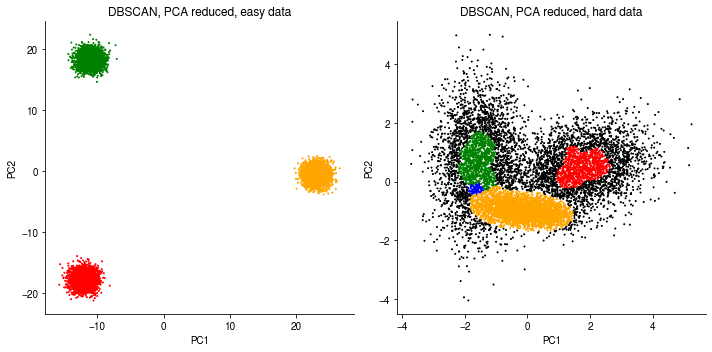

In [17]:
f, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
# repeating list of colors that we can index into using cluster IDs:
colorset = np.array(['red', 'orange', 'green', 'blue', 'magenta', 'gray', 'brown', 'black']*10)

## easy data:
dbscan = cluster.DBSCAN(eps=2, min_samples=80) # create a DBSCAN object, set its two parameters
dbscan.fit(easy2) # apply DBSCAN to the easy dimension-reduced data
cids = dbscan.labels_ # get resulting cluster IDs from the kmeans object, one for each sample
colors = colorset[cids] # convert cluster IDs to colors
ax[0].scatter(easy2[:, 0], easy2[:, 1], s=1, color=colors) # plot x vs. y for all samples
ax[0].set_title('DBSCAN, PCA reduced, easy data')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

## hard data:
dbscan = cluster.DBSCAN(eps=0.2075, min_samples=80) # create a DBSCAN object, set its two parameters
dbscan.fit(hard2) # apply DBSCAN to the hard dimension-reduced data
cids = dbscan.labels_ # get resulting cluster IDs from the kmeans object, one for each sample
colors = colorset[cids] # convert cluster IDs to colors
ax[1].scatter(hard2[:, 0], hard2[:, 1], s=1, color=colors) # plot x vs. y for all samples
ax[1].set_title('DBSCAN, PCA reduced, hard data')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')